In [1]:
import cv2

from lexoid.core.conversion_utils import convert_doc_to_base64_images, base64_to_cv2_image
from lexoid.api import parse
from lexoid.core.utils import find_bboxes_for_substring, visualize_bounding_boxes

/home/dilith/Projects/oidlabs/pdf-parser/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pdf_path = "inputs/test_1.pdf"

In [3]:
page_images = convert_doc_to_base64_images(pdf_path)
_, b64_img = page_images[0]
cv2_img = base64_to_cv2_image(b64_img)
rgb_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)

## With `STATIC_PARSE`

In [4]:
result = parse(pdf_path, parser_type="STATIC_PARSE", return_bboxes=True)

2025-09-15 13:35:50.690 | DEBUG    | lexoid.core.utils:is_supported_file_type:64 - File type: application/pdf
2025-09-15 13:35:50.695 | DEBUG    | lexoid.api:parse_chunk:125 - Using static parser


In [5]:
seg_idx = 0
segment = result["segments"][seg_idx]
content = segment["content"]
bboxes = segment["bboxes"]

Found 3 bounding boxes: [(0.7894117647058824, 0.21915151515151512, 0.8298627450980393, 0.2343030303030303), (0.8343137254901961, 0.21915151515151512, 0.8517254901960783, 0.2343030303030303), (0.7821568627450981, 0.24036363636363628, 0.8588823529411764, 0.2555151515151514)]


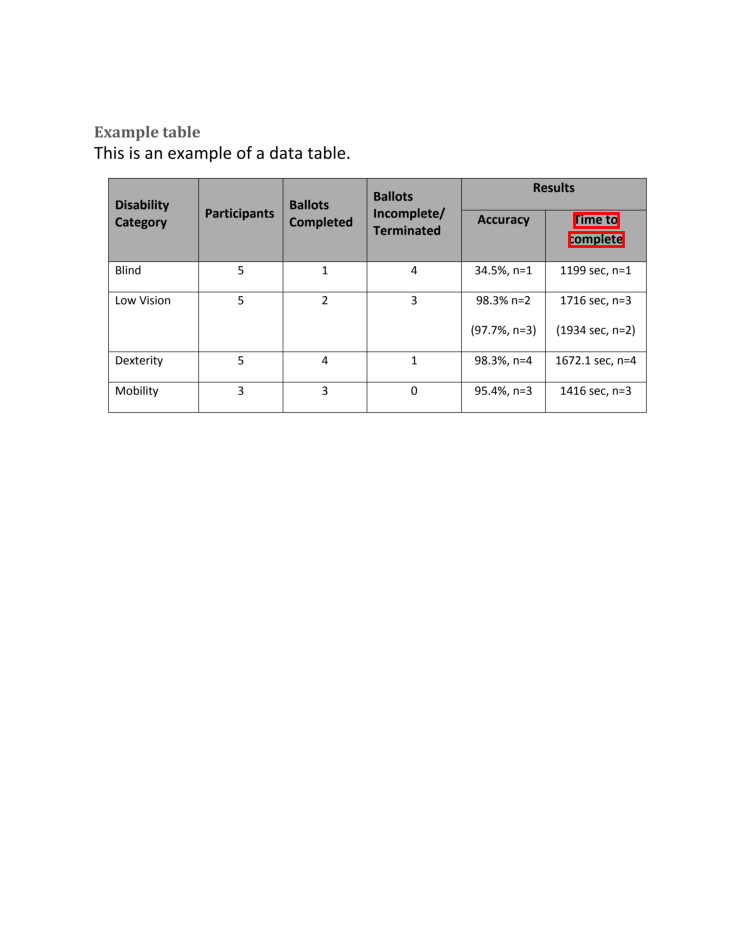

In [6]:
substring = "Time 2 complete"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring)
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

Found 2 bounding boxes: [(0.3911764705882353, 0.20339393939393935, 0.446843137254902, 0.21854545454545451), (0.5088235294117647, 0.19415151515151519, 0.5644901960784314, 0.20930303030303035)]


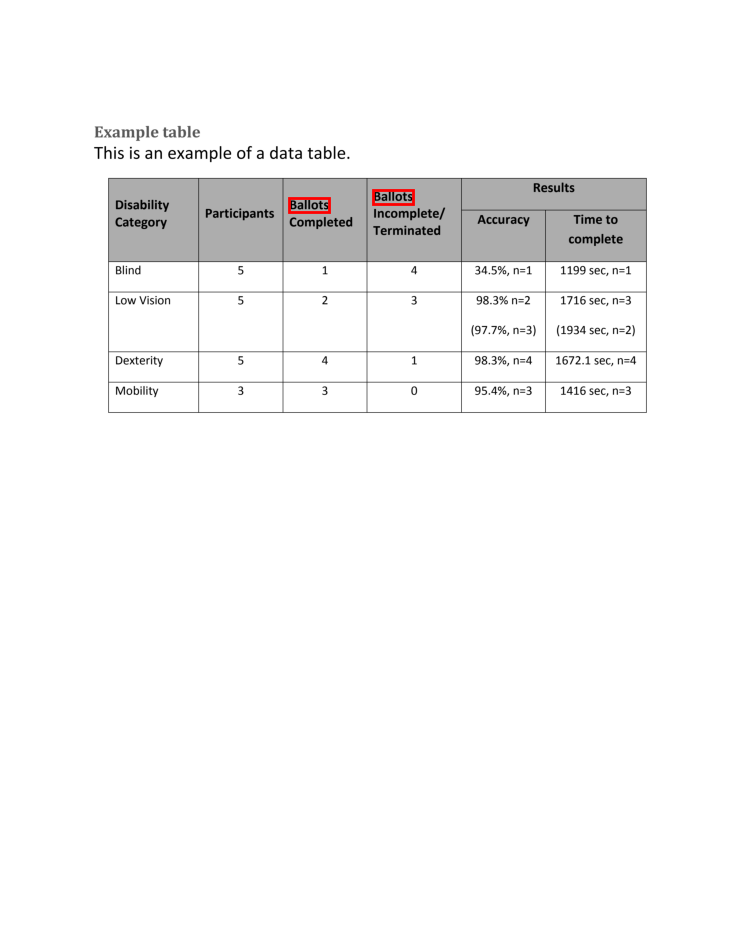

In [7]:
substring = "Ballots"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring, match_mode="all_matches")
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

## With `LLM_PARSE`

In [8]:
result = parse(pdf_path, parser_type="LLM_PARSE", return_bboxes=True)

2025-09-15 13:35:51.545 | DEBUG    | lexoid.core.utils:is_supported_file_type:64 - File type: application/pdf
2025-09-15 13:35:51.550 | DEBUG    | lexoid.api:parse_chunk:128 - Using LLM parser


In [9]:
seg_idx = 0
segment = result["segments"][seg_idx]
content = segment["content"]
bboxes = segment["bboxes"]

Found 3 bounding boxes: [(0.7894117647058824, 0.21915151515151512, 0.8298627450980393, 0.2343030303030303), (0.8343137254901961, 0.21915151515151512, 0.8517254901960783, 0.2343030303030303), (0.7821568627450981, 0.24036363636363628, 0.8588823529411764, 0.2555151515151514)]


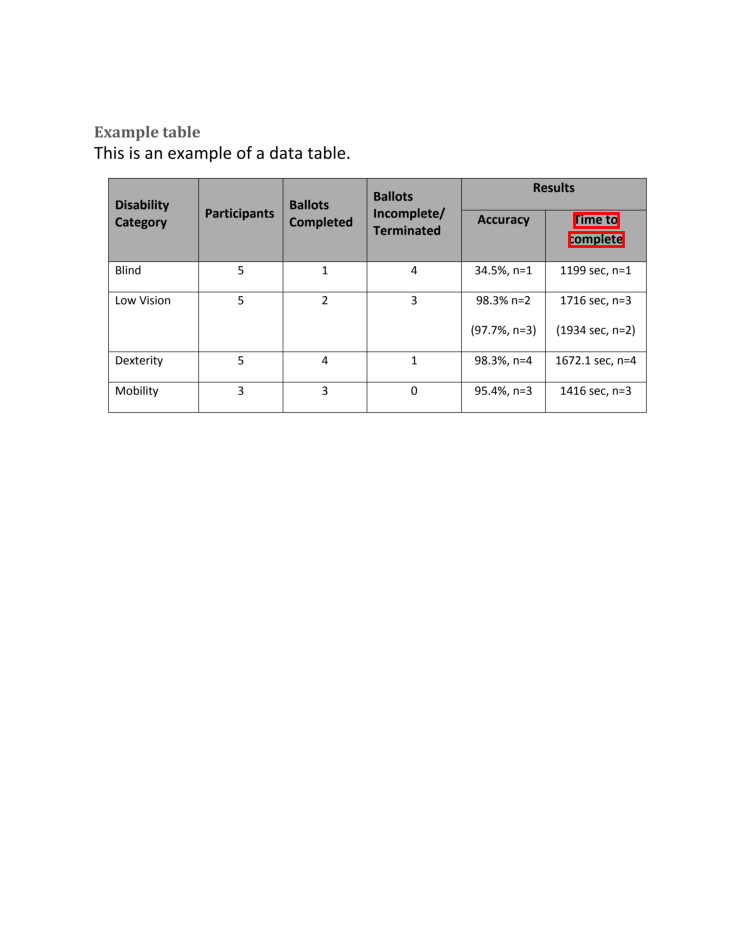

In [10]:
substring = "Time 2 complete"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring)
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

Found 2 bounding boxes: [(0.3911764705882353, 0.20339393939393935, 0.446843137254902, 0.21854545454545451), (0.5088235294117647, 0.19415151515151519, 0.5644901960784314, 0.20930303030303035)]


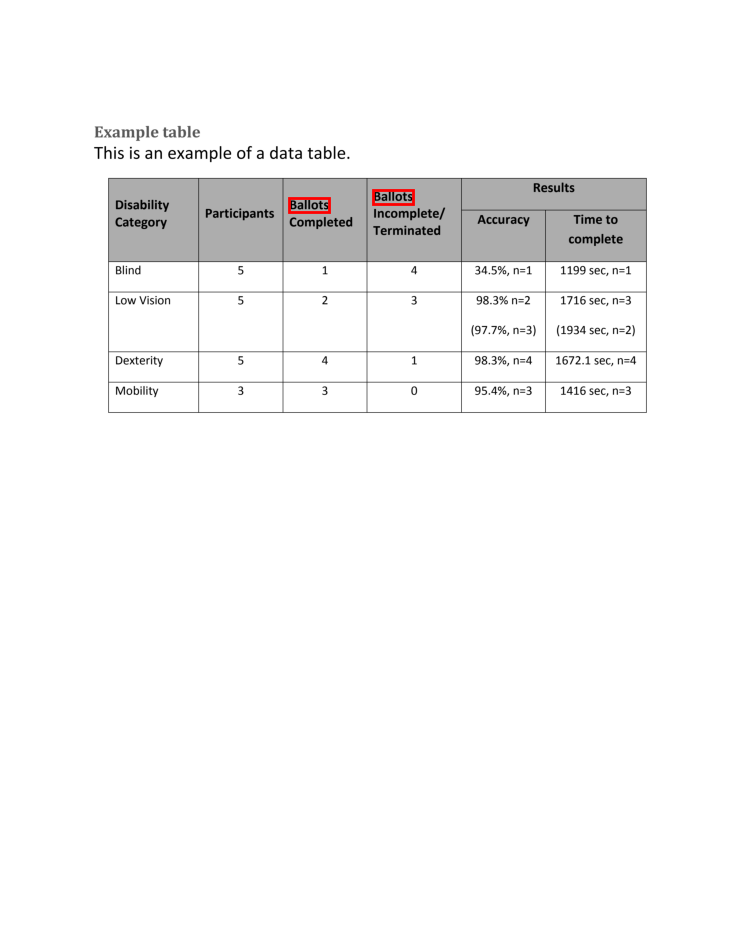

In [11]:
substring = "Ballots"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring, match_mode="all_matches")
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

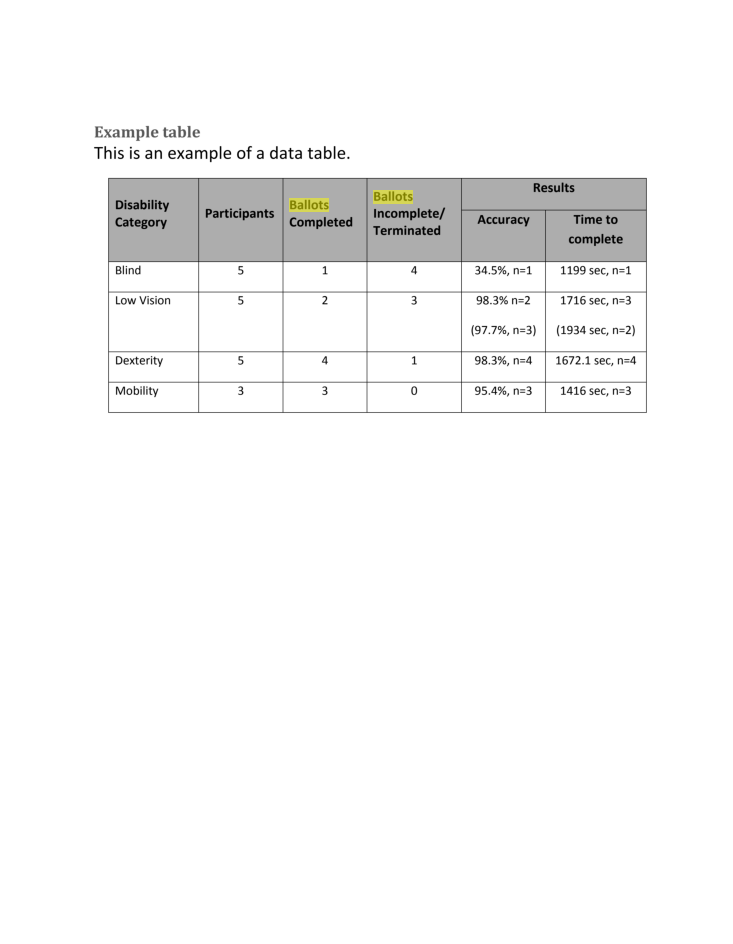

In [12]:
visualize_bounding_boxes(rgb_img, matched_bboxes, highlight=True)